In [1]:
%load_ext lab_black

In [47]:
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

import joblib

In [3]:
# read in data
df = pd.read_csv("heart_disease_data.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
# drop unused columns
df = (
    df.drop("restecg", axis=1)
    .drop("oldpeak", axis=1)
    .drop("slope", axis=1)
    .drop("ca", axis=1)
    .drop("thal", axis=1)
)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'condition'],
      dtype='object')

In [7]:
df["condition"].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [9]:
# rename exang: exercise induced angina (1 = yes; 0 = no)
df = df.assign(exang=lambda df: df["exang"].replace({0: "no", 1: "yes"}))

In [10]:
# rename sex
df = df.assign(sex=lambda df: df["sex"].replace({0: "female", 1: "male"}))

In [11]:
# rename fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
df = df.assign(fbs=lambda df: df["fbs"].replace({0: "no", 1: "yes"}))

In [12]:
# rename cp: chest pain type
df = df.assign(
    cp=lambda df: df["cp"].replace(
        {
            0: "typical angina",
            1: "atypical angina",
            2: "non-anginal pain",
            3: "asymptomatic",
        }
    )
)

In [13]:
target = "condition"

In [14]:
y = df[target]
X = df.drop(target, axis=1)

In [17]:
cf = ColumnTransformer(
    [
        ("numerical", "passthrough", ["age", "trestbps", "chol", "thalach"],),
        ('"categorical"', OneHotEncoder(drop="first"), ["sex", "cp", "fbs", "exang"]),
    ]
)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [19]:
# Dummy Classifier

d_pipeline = make_pipeline(cf, DummyClassifier())
d_pipeline.fit(X_train, y_train)
y_test_pred_dc = d_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_dc))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        40
           1       0.00      0.00      0.00        35

    accuracy                           0.53        75
   macro avg       0.27      0.50      0.35        75
weighted avg       0.28      0.53      0.37        75



/home/jupyter/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jupyter/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jupyter/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# accuracy score for Dummy Classifier

accuracy_score(y_test, y_test_pred_dc)

0.5333333333333333

In [21]:
# Logistic Regression Model

lr_pipeline = make_pipeline(cf, LogisticRegression(max_iter=1000))
lr_pipeline.fit(X_train, y_train)
y_test_pred_lr = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        40
           1       0.80      0.69      0.74        35

    accuracy                           0.77        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.78      0.77      0.77        75



In [22]:
# accuracy score for Logistic Regression Model

accuracy_score(y_test, y_test_pred_lr)

0.7733333333333333

In [23]:
# Decision Tree Model (unpruned)

dt_pipeline = make_pipeline(cf, DecisionTreeClassifier())
dt_pipeline.fit(X_train, y_train)
y_test_pred_dt = dt_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67        40
           1       0.62      0.57      0.60        35

    accuracy                           0.64        75
   macro avg       0.64      0.64      0.64        75
weighted avg       0.64      0.64      0.64        75



In [24]:
# accuracy score for decision tree model (unpruned)

accuracy_score(y_test, y_test_pred_dt)

0.64

In [26]:
# Prune the tree - gini

dt_pipeline_p1 = make_pipeline(cf, DecisionTreeClassifier(criterion="gini"))
dt_pipeline_p1.fit(X_train, y_train)
y_test_pred_dt_p1 = dt_pipeline_p1.predict(X_test)
print("Criterion=gini", classification_report(y_test, y_test_pred_dt_p1))

Criterion=gini               precision    recall  f1-score   support

           0       0.67      0.70      0.68        40
           1       0.64      0.60      0.62        35

    accuracy                           0.65        75
   macro avg       0.65      0.65      0.65        75
weighted avg       0.65      0.65      0.65        75



In [27]:
# accuracy score for decision tree model using gini

accuracy_score(y_test, y_test_pred_dt_p1)

0.6533333333333333

In [28]:
# Prune the tree - entropy

dt_pipeline_p2 = make_pipeline(cf, DecisionTreeClassifier(criterion="entropy"))
dt_pipeline_p2.fit(X_train, y_train)
y_test_pred_dt_p2 = dt_pipeline_p2.predict(X_test)
print("Criterion=entropy", classification_report(y_test, y_test_pred_dt_p2))

Criterion=entropy               precision    recall  f1-score   support

           0       0.64      0.68      0.66        40
           1       0.61      0.57      0.59        35

    accuracy                           0.63        75
   macro avg       0.62      0.62      0.62        75
weighted avg       0.63      0.63      0.63        75



In [29]:
# accuracy score for decision tree model using entropy

accuracy_score(y_test, y_test_pred_dt_p2)

0.6266666666666667

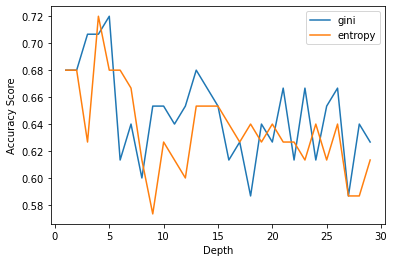

In [30]:
# Prune the tree - loop to find best depth

max_depth_dt = []
acc_gini_dt = []
acc_entropy_dt = []
for i in range(1, 30):
    dt_pipeline_p3 = make_pipeline(
        cf, DecisionTreeClassifier(criterion="gini", max_depth=i)
    )
    dt_pipeline_p3.fit(X_train, y_train)
    pred_g_dt = dt_pipeline_p3.predict(X_test)
    acc_gini_dt.append(accuracy_score(y_test, pred_g_dt))

    dt_pipeline_p4 = make_pipeline(
        cf, DecisionTreeClassifier(criterion="entropy", max_depth=i)
    )
    dt_pipeline_p4.fit(X_train, y_train)
    pred_e_dt = dt_pipeline_p4.predict(X_test)
    acc_entropy_dt.append(accuracy_score(y_test, pred_e_dt))

    max_depth_dt.append(i)

df_dt = pd.DataFrame(
    {
        "acc_gini_dt": pd.Series(acc_gini_dt),
        "acc_entropy_dt": pd.Series(acc_entropy_dt),
        "max_depth_dt": pd.Series(max_depth_dt),
    }
)

# visualizing changes in parameters
plt.plot("max_depth_dt", "acc_gini_dt", data=df_dt, label="gini")
plt.plot("max_depth_dt", "acc_entropy_dt", data=df_dt, label="entropy")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()

In [31]:
# Prune tree at 5 using gini

dt_p_fin = make_pipeline(cf, DecisionTreeClassifier(criterion="gini", max_depth=5))
dt_p_fin.fit(X_train, y_train)
y_test_pred_dt_p_fin = dt_p_fin.predict(X_test)
print("Criterion=gini", classification_report(y_test, y_test_pred_dt_p_fin))

Criterion=gini               precision    recall  f1-score   support

           0       0.77      0.68      0.72        40
           1       0.68      0.77      0.72        35

    accuracy                           0.72        75
   macro avg       0.72      0.72      0.72        75
weighted avg       0.73      0.72      0.72        75



In [32]:
# accuracy score for decision tree model pruned at 5 using gini

accuracy_score(y_test, y_test_pred_dt_p_fin)

0.72

In [34]:
# Random Forest Model

rf_pipeline = make_pipeline(cf, RandomForestClassifier(n_estimators=10000))
rf_pipeline.fit(X_train, y_train)
y_test_pred_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        40
           1       0.77      0.69      0.73        35

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75



In [35]:
# accuracy score for random forest model (unpruned)

accuracy_score(y_test, y_test_pred_rf)

0.76

In [36]:
# Prune the forest - gini

rf_pipeline_p1 = make_pipeline(
    cf, RandomForestClassifier(n_estimators=10000, criterion="gini")
)
rf_pipeline_p1.fit(X_train, y_train)
y_test_pred_rf_p1 = rf_pipeline_p1.predict(X_test)
print("Criterion=gini", classification_report(y_test, y_test_pred_rf_p1))

Criterion=gini               precision    recall  f1-score   support

           0       0.75      0.82      0.79        40
           1       0.77      0.69      0.73        35

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75



In [37]:
# accuracy score for random forest model using gini

accuracy_score(y_test, y_test_pred_rf_p1)

0.76

In [38]:
# Prune the forest - entropy

rf_pipeline_p2 = make_pipeline(
    cf, RandomForestClassifier(n_estimators=10000, criterion="entropy")
)
rf_pipeline_p2.fit(X_train, y_train)
y_test_pred_rf_p2 = rf_pipeline_p2.predict(X_test)
print("Criterion=entropy", classification_report(y_test, y_test_pred_rf_p2))

Criterion=entropy               precision    recall  f1-score   support

           0       0.75      0.82      0.79        40
           1       0.77      0.69      0.73        35

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75



In [39]:
# accuracy score for random forest model using entropy

accuracy_score(y_test, y_test_pred_rf_p2)

0.76

In [43]:
rf_pipeline.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach']),
                                                 ('"categorical"',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'cp', 'fbs',
                                                   'exang'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [44]:
rf_pipeline.predict(
    pd.DataFrame(
        {
            "age": 65,
            "sex": "male",
            "cp": "asymptomatic",
            "trestbps": 110,
            "chol": 264,
            "fbs": "yes",
            "thalach": 131,
            "exang": "yes",
        },
        index=[0],
    )
)[0]

1